In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Path

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Flacso/BDDenemdu_personas_2024_anual.csv'

#Librerias

In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [4]:
!pip install git+https://github.com/py-why/causal-learn.git

  Cloning https://github.com/py-why/causal-learn.git to /tmp/pip-req-build-e393nmbs
  Running command git clone --filter=blob:none --quiet https://github.com/py-why/causal-learn.git /tmp/pip-req-build-e393nmbs
  Resolved https://github.com/py-why/causal-learn.git to commit 474437c427c5823610c6ca6a03a7fe2a0420db1a
  Preparing metadata (setup.py) ... done
  Created wheel for causal-learn: filename=causal_learn-0.1.4.3-py3-none-any.whl size=242173 sha256=ae52995713d99d3d98386d7d29832ef1a801d472de2d77c1142e7a8b1c36d24a
  Stored in directory: /tmp/pip-ephem-wheel-cache-tqpiugx3/wheels/87/81/9d/85f7f57f5fcf97732e3f93b20dcb7328d890464ff5263d9c62
Successfully built causal-learn


In [5]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import CIT, fisherz

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import ParameterEstimator, BayesianEstimator

from pgmpy.inference import VariableElimination

#Escenario 1

##Importacion de base de datos

In [98]:
try:
    df = pd.read_csv(file_path, sep=";")
    print("Archivo CSV cargado exitosamente.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

/tmp/ipython-input-2798219710.py:2: DtypeWarning: Columns (131,132,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";")


Archivo CSV cargado exitosamente.


,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,prov,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes
0,1,10150,304,42,1,1,1,1,31,1,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403,3
1,1,10150,304,42,1,1,2,2,39,2,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3
2,1,10150,304,42,1,1,3,1,7,7,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110303,202403,3
3,1,10150,304,42,1,1,4,1,1,3,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110403,202403,3
4,1,10150,304,42,1,1,1,1,31,1,...,1,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406,6


###Depuracion variable: ingrl

In [99]:
#cambiar ingrl de objet to float
df['ingrl'] = pd.to_numeric(df['ingrl'], errors='coerce')
#Cambiar los que tengan ingrl=999999 a NaN"
df['ingrl'] = df['ingrl'].replace(999999, np.nan)
df['ingrl'] = df['ingrl'].replace(-1, np.nan)

###Depuracion variable: empleo

In [100]:
#convertimos empleo en float
df['empleo'] = pd.to_numeric(df['empleo'], errors='coerce')
#reemplazamos como 0 donde hay missing en la variable empleo
df['empleo'] = df['empleo'].replace(np.nan, 0)

###Numero de personas en el hogar

In [101]:
# Crear una nueva columna con el número de observaciones por id_hogar
df['pers_por_hogar'] = df.groupby('id_hogar')['id_hogar'].transform('count')

display(df.head(15))

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar
0,1,10150,304,42,1,1,1,1,31,1,...,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403,3,4
1,1,10150,304,42,1,1,2,2,39,2,...,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,4
2,1,10150,304,42,1,1,3,1,7,7,...,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110303,202403,3,4
3,1,10150,304,42,1,1,4,1,1,3,...,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110403,202403,3,4
4,1,10150,304,42,1,1,1,1,31,1,...,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406,6,4
5,1,10150,304,42,1,1,2,2,39,2,...,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,4
6,1,10150,304,42,1,1,3,1,1,3,...,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110306,202406,6,4
7,1,10150,304,42,1,1,4,1,8,7,...,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110406,202406,6,4
8,1,10150,304,42,2,1,1,1,56,1,...,3,0,0,10150000304,101500003040420203,1015000030404202103,0101500003040420210103,202403,3,3
9,1,10150,304,42,2,1,2,2,30,3,...,3,0,0,10150000304,101500003040420203,1015000030404202103,0101500003040420210203,202403,3,3


###Variable de escolaridad

In [102]:
#cambiar p10a y p10b de objet to float
df['p10a'] = pd.to_numeric(df['p10a'], errors='coerce')
df['p10b'] = pd.to_numeric(df['p10b'], errors='coerce')

In [103]:
# Inicializar la columna 'escolaridad' con valor 0 cuando p10a == 1
df['escolaridad'] = 0
df.loc[df['p10a'] == 1, 'escolaridad'] = 0

# Reemplazar 'escolaridad' con 'p10b' cuando p10a == 2, 4, o 5
df.loc[df['p10a'].isin([2, 4, 5]), 'escolaridad'] = df['p10b']

# Reemplazar 'escolaridad' con 'p10b + 6' cuando p10a == 6 o 7
df.loc[df['p10a'].isin([6, 7]), 'escolaridad'] = df['p10b'] + 6

# Reemplazar 'escolaridad' con 'p10b + 12' cuando p10a == 8 o 9
df.loc[df['p10a'].isin([8, 9]), 'escolaridad'] = df['p10b'] + 12

# Reemplazar 'escolaridad' con 'p10b + 17' cuando p10a == 10
df.loc[df['p10a'] == 10, 'escolaridad'] = df['p10b'] + 17

# Mostrar los primeros registros para verificar
display(df.head())

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad
0,1,10150,304,42,1,1,1,1,31,1,...,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403,3,4,12
1,1,10150,304,42,1,1,2,2,39,2,...,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,4,19
2,1,10150,304,42,1,1,3,1,7,7,...,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110303,202403,3,4,2
3,1,10150,304,42,1,1,4,1,1,3,...,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110403,202403,3,4,0
4,1,10150,304,42,1,1,1,1,31,1,...,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406,6,4,12


##Rango de edad

In [104]:
#Edad
edad_floor=20
edad_roof=60

###Ingreso de la pareja

####Jefe de Hogar (hombre) - Conyuge (mujer)

In [105]:
fil_1=1 #hombre: jefe de hogar
fil_2=2 #mujer: conyuge

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].first().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_1 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

####Jefe de Hogar (mujer) - Conyuge (hombre)

In [106]:
fil_1=2 #hombre: conyuge
fil_2=1 #mujer: jefe de hogar

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].first().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_2 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

####Hija - Yerno

In [107]:
fil_1=4 #hombre: yerno
fil_2=3 #mujer: hija

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].mean().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_3 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

####Hijo - Nuera

In [108]:
fil_1=3 #hombre: hijo
fil_2=4 #mujer: nuera

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].mean().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_4 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

##Grafos causales

###Modelo 1

In [109]:
#Se hace un filtro con el resto de mujeres
df_resultado_5 = df[(~df['p04'].isin([1,2]) ) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

In [110]:
#Hacemos un append
df_resultado_modelo_1 = pd.concat([df_resultado_1, df_resultado_2,df_resultado_5], ignore_index=True)

In [111]:
df_resultado_modelo_1

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad,ingrl_pareja
0,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,4,19,1010.0
1,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,4,19,1121.0
2,1,10150,304,42,3,1,2,2,37,2,...,0,10150000304,101500003040420303,1015000030404203103,0101500003040420310203,202403,3,5,6,250.0
3,1,10150,304,42,3,1,2,2,37,2,...,0,10150000304,101500003040420306,1015000030404203106,0101500003040420310206,202406,6,5,6,420.0
4,1,10150,304,42,7,1,2,2,42,2,...,0,10150000304,101500003040420703,1015000030404207103,0101500003040420710203,202403,3,4,9,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94850,1,240352,3202,37,6,1,3,2,39,3,...,0,240352003202,2403520032020370601,24035200320203706101,2403520032020370610301,202401,1,8,9,NaN
94851,1,240352,3202,37,6,1,3,2,39,3,...,0,240352003202,2403520032020370604,24035200320203706104,2403520032020370610304,202404,4,8,9,NaN
94852,1,240352,3202,43,4,1,4,2,28,3,...,0,240352003202,2403520032020430407,24035200320204304107,2403520032020430410407,202407,7,5,9,NaN
94853,1,240352,3202,43,4,1,4,2,28,3,...,0,240352003202,2403520032020430410,24035200320204304110,2403520032020430410410,202410,10,5,9,NaN


In [112]:
#Comprobar si hay duplicados de id_persona
df_resultado_modelo_1[df_resultado_modelo_1.duplicated(subset='id_persona', keep=False)]

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad,ingrl_pareja


####Base de datos final

In [113]:
#A la variable ingrl a los Nan los pongo 0
df_resultado_modelo_1['ingrl_pareja'] = df_resultado_modelo_1['ingrl_pareja'].fillna(0)

In [114]:
#cambiar nombres a las variabkles
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p03': 'edad'})
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p06':'estado_civil'})
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p11':'sabe_leer_escribir'})
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p15':'raza'})

In [115]:
#cambiar estado_civil, sabe_leer_escribir,raza de objet to float
df_resultado_modelo_1['estado_civil'] = pd.to_numeric(df_resultado_modelo_1['estado_civil'], errors='coerce')
df_resultado_modelo_1['sabe_leer_escribir'] = pd.to_numeric(df_resultado_modelo_1['sabe_leer_escribir'], errors='coerce')
df_resultado_modelo_1['raza'] = pd.to_numeric(df_resultado_modelo_1['raza'], errors='coerce')

In [116]:
#Me quedo con las variables edad, estado_civil, ingrl_pareja,escolaridad,pers_por_hogar,empleo,area
df_final_1=df_resultado_modelo_1[['edad','estado_civil','ingrl_pareja','escolaridad','pers_por_hogar','empleo','area','raza']]

In [117]:
df_final_1.describe()

,edad,estado_civil,ingrl_pareja,escolaridad,pers_por_hogar,empleo,area,raza
count,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000
mean,39.211291,3.658173,287.232850,11.168341,4.178219,0.632439,1.242380,5.524253
std,11.936577,2.138840,586.511332,4.477762,1.888215,0.482144,0.428526,1.395173
min,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,28.000000,1.000000,0.000000,8.000000,3.000000,0.000000,1.000000,6.000000
50%,39.000000,5.000000,0.000000,12.000000,4.000000,1.000000,1.000000,6.000000
75%,50.000000,6.000000,460.000000,15.000000,5.000000,1.000000,1.000000,6.000000
max,60.000000,6.000000,20000.000000,22.000000,21.000000,1.000000,2.000000,8.000000


####Grafo

In [118]:
#Preparar los datos -----------
data_np = df_final_1.to_numpy()
labels = df_final_1.columns.tolist()

#Ejecutar PC con G‑Square para variables discretas -----------
cit_obj = CIT(data_np, "gsq")  # o "chisq" según prefieras
cg = pc(data_np, alpha=0.01, indep_test_func=cit_obj, labels=labels)

  0%|          | 0/8 [00:00<?, ?it/s]

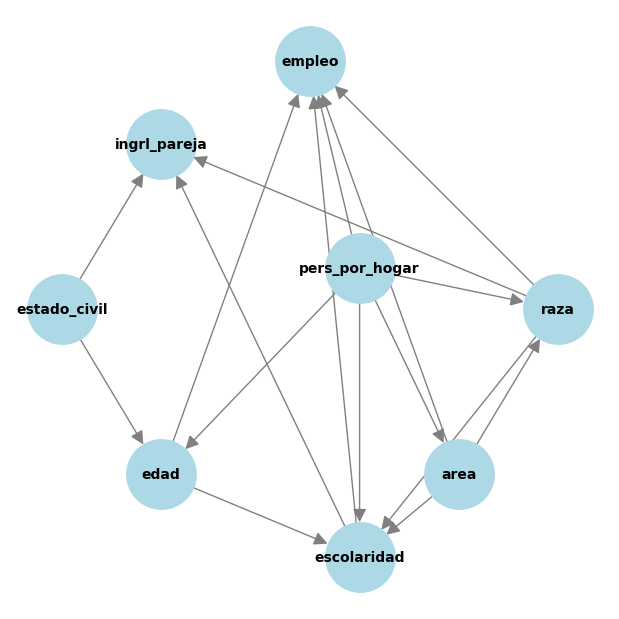

In [119]:
#Extraer aristas del grafo aprendido
converted_edges = []
for edge in cg.G.get_graph_edges():
    n1 = edge.node1.get_name()
    n2 = edge.node2.get_name()
    idx1 = int(n1[1:]) - 1  # X1 → índice 0
    idx2 = int(n2[1:]) - 1
    name1 = labels[idx1]
    name2 = labels[idx2]
    converted_edges.append((name1, name2))

#Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(converted_edges)

plt.figure(figsize=(6, 6))
#Posiciones
pos = {
    'edad': (0, 0),
    'estado_civil': (-1,2),
    'ingrl_pareja': (0,4),
    'escolaridad': (2,-1),
    'pers_por_hogar': (2,2.5),
    'empleo': (1.5,5),
    'area': (3,0),
    'raza': (4,2),
}

#Grafico
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)
plt.axis("off")
plt.savefig('Fig_1_1.png')
plt.show()

###Modelo 2

In [120]:
#Se hace un filtro con el resto de mujeres
df_resultado_5 = df[(~df['p04'].isin([1,2,3,4]) ) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

In [121]:
#Hacemos un append
df_resultado_modelo_2 = pd.concat([df_resultado_1, df_resultado_2,df_resultado_3,df_resultado_4,df_resultado_5], ignore_index=True)

In [122]:
df_resultado_modelo_2

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad,ingrl_pareja
0,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,4,19,1010.0
1,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,4,19,1121.0
2,1,10150,304,42,3,1,2,2,37,2,...,0,10150000304,101500003040420303,1015000030404203103,0101500003040420310203,202403,3,5,6,250.0
3,1,10150,304,42,3,1,2,2,37,2,...,0,10150000304,101500003040420306,1015000030404203106,0101500003040420310206,202406,6,5,6,420.0
4,1,10150,304,42,7,1,2,2,42,2,...,0,10150000304,101500003040420703,1015000030404207103,0101500003040420710203,202403,3,4,9,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94850,1,240352,1105,51,5,1,2,2,24,5,...,0,240352001105,2403520011050510512,24035200110505105112,2403520011050510510212,202412,12,2,10,NaN
94851,1,240352,1401,47,3,1,2,2,27,9,...,0,240352001401,2403520014010470311,24035200140104703111,2403520014010470310211,202411,11,3,16,NaN
94852,1,240352,1401,47,3,1,3,2,24,9,...,0,240352001401,2403520014010470311,24035200140104703111,2403520014010470310311,202411,11,3,16,NaN
94853,1,240352,2501,58,4,1,3,2,43,7,...,0,240352002501,2403520025010580412,24035200250105804112,2403520025010580410312,202412,12,5,12,NaN


####Base de datos final

In [123]:
#A la variable ingrl a los Nan los pongo 0
df_resultado_modelo_2['ingrl_pareja'] = df_resultado_modelo_2['ingrl_pareja'].fillna(0)

In [124]:
#cambiar nombres a las variabkles
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p03': 'edad'})
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p06':'estado_civil'})
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p11':'sabe_leer_escribir'})
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p15':'raza'})

In [125]:
#cambiar estado_civil, sabe_leer_escribir,raza de objet to float
df_resultado_modelo_2['estado_civil'] = pd.to_numeric(df_resultado_modelo_2['estado_civil'], errors='coerce')
df_resultado_modelo_2['sabe_leer_escribir'] = pd.to_numeric(df_resultado_modelo_2['sabe_leer_escribir'], errors='coerce')
df_resultado_modelo_2['raza'] = pd.to_numeric(df_resultado_modelo_2['raza'], errors='coerce')

In [126]:
#Me quedo con las variables edad, estado_civil, ingrl_pareja,escolaridad,pers_por_hogar,empleo,area
df_final_2=df_resultado_modelo_2[['edad','estado_civil','ingrl_pareja','escolaridad','pers_por_hogar','empleo','area','raza']]

In [127]:
df_final_2.describe()

,edad,estado_civil,ingrl_pareja,escolaridad,pers_por_hogar,empleo,area,raza
count,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000
mean,39.211291,3.658173,311.004443,11.168341,4.178219,0.632439,1.242380,5.524253
std,11.936577,2.138840,591.914758,4.477762,1.888215,0.482144,0.428526,1.395173
min,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,28.000000,1.000000,0.000000,8.000000,3.000000,0.000000,1.000000,6.000000
50%,39.000000,5.000000,0.000000,12.000000,4.000000,1.000000,1.000000,6.000000
75%,50.000000,6.000000,480.000000,15.000000,5.000000,1.000000,1.000000,6.000000
max,60.000000,6.000000,20000.000000,22.000000,21.000000,1.000000,2.000000,8.000000


####Grafo

In [128]:
#Preparar los datos -----------
data_np = df_final_2.to_numpy()
labels = df_final_2.columns.tolist()

#Ejecutar PC con G‑Square para variables discretas -----------
cit_obj = CIT(data_np, "gsq")  # o "chisq" según prefieras
cg = pc(data_np, alpha=0.01, indep_test_func=cit_obj, labels=labels)

  0%|          | 0/8 [00:00<?, ?it/s]

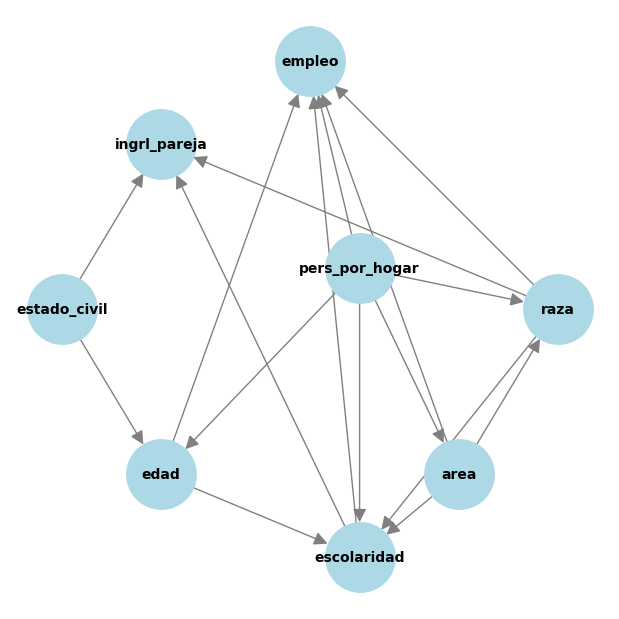

In [129]:
#Extraer aristas del grafo aprendido
converted_edges = []
for edge in cg.G.get_graph_edges():
    n1 = edge.node1.get_name()
    n2 = edge.node2.get_name()
    idx1 = int(n1[1:]) - 1  # X1 → índice 0
    idx2 = int(n2[1:]) - 1
    name1 = labels[idx1]
    name2 = labels[idx2]
    converted_edges.append((name1, name2))

#Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(converted_edges)

plt.figure(figsize=(6, 6))
#Posiciones
pos = {
    'edad': (0, 0),
    'estado_civil': (-1,2),
    'ingrl_pareja': (0,4),
    'escolaridad': (2,-1),
    'pers_por_hogar': (2,2.5),
    'empleo': (1.5,5),
    'area': (3,0),
    'raza': (4,2),
}

#Grafico
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)

plt.axis("off")
plt.savefig('Fig_2_1.png')
plt.show()

##Red bayesiana

In [130]:
# Crear el modelo con la estructura aprendida
model = DiscreteBayesianNetwork(converted_edges)

# Ajustar el modelo a los datos
model.fit(df_final_2, estimator=BayesianEstimator, prior_type='BDeu')

In [131]:
# Verificar que el modelo es válido
assert model.check_model()

In [132]:
# Crear objeto de inferencia usando eliminación de variables
infer = VariableElimination(model)

###P(Empleo|ingrl_pareja)

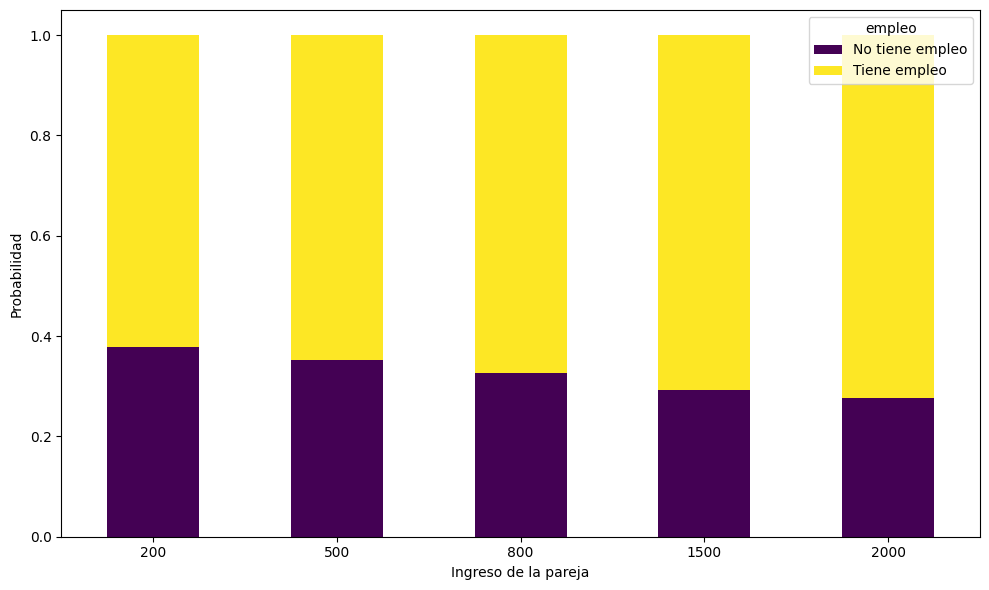

In [133]:
valores_posibles=[200,500,800,1500,2000]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'ingrl_pareja': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='viridis', figsize=(10,6))

df_res.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))

plt.xlabel('Ingreso de la pareja')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_3_1.png')
plt.show()

###P(Empleo|estado_civil)

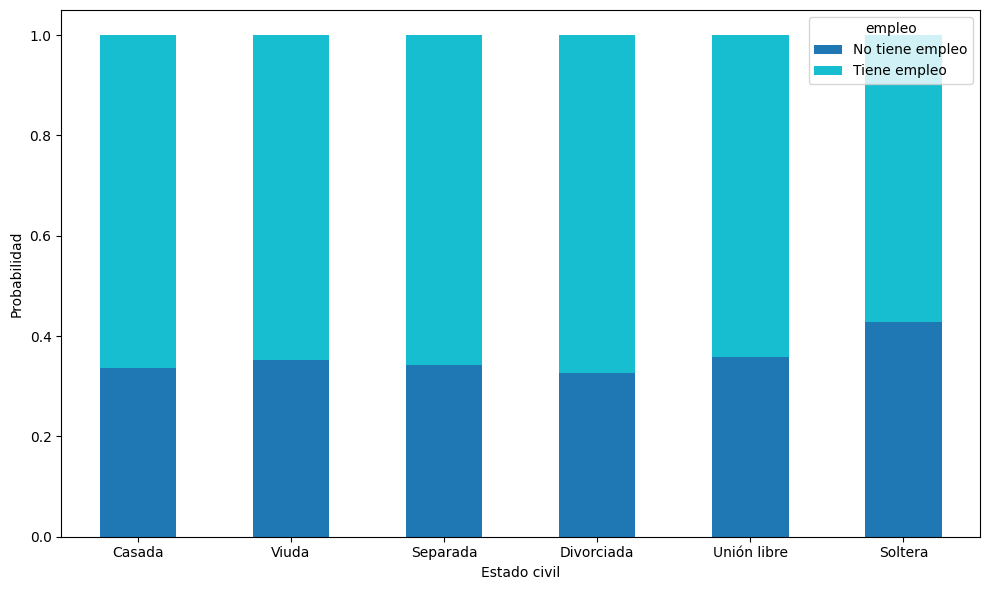

In [134]:
valores_posibles = [1,4,2,3,5,6]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'estado_civil': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

df_res.index = ['Casada', 'Viuda', 'Separada', 'Divorciada', 'Unión libre', 'Soltera']


# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

#df_res_no_tiene_empleo.index = ['Casada', 'Viuda', 'Separada', 'Divorciada', 'Unión libre', 'Soltera']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='tab10', figsize=(10,6))

df_res.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))

plt.xlabel('Estado civil')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_4_1.png')
plt.show()

###P(Empleo|pers_por_hogar)

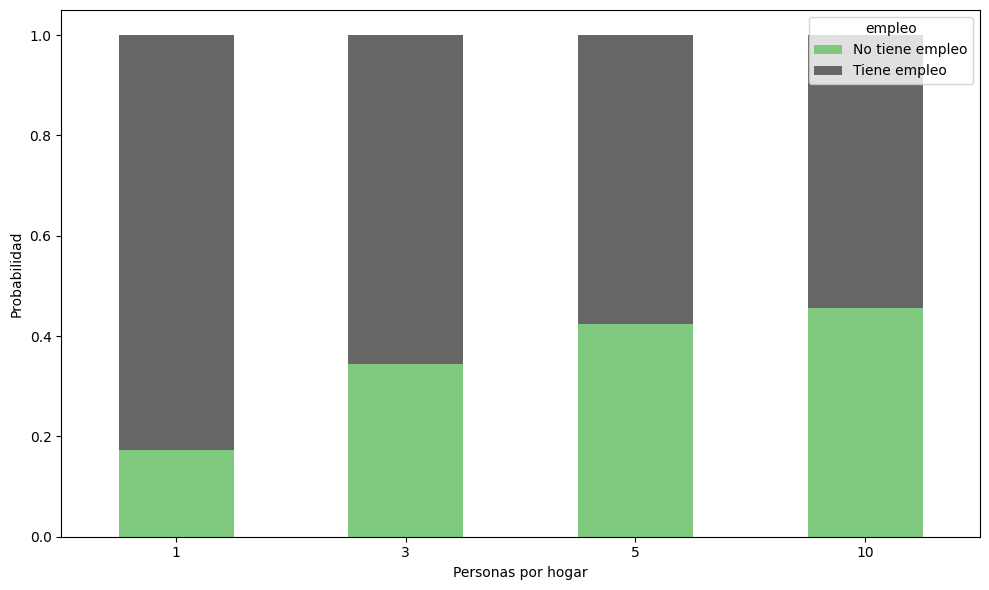

In [135]:
valores_posibles = [1,3,5,10]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'pers_por_hogar': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='Accent', figsize=(10,6))


df_res.plot(kind='bar', stacked=True, colormap='Accent', figsize=(10,6))

plt.xlabel('Personas por hogar')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_5_1.png')
plt.show()

###P(Empleo|escolaridad)

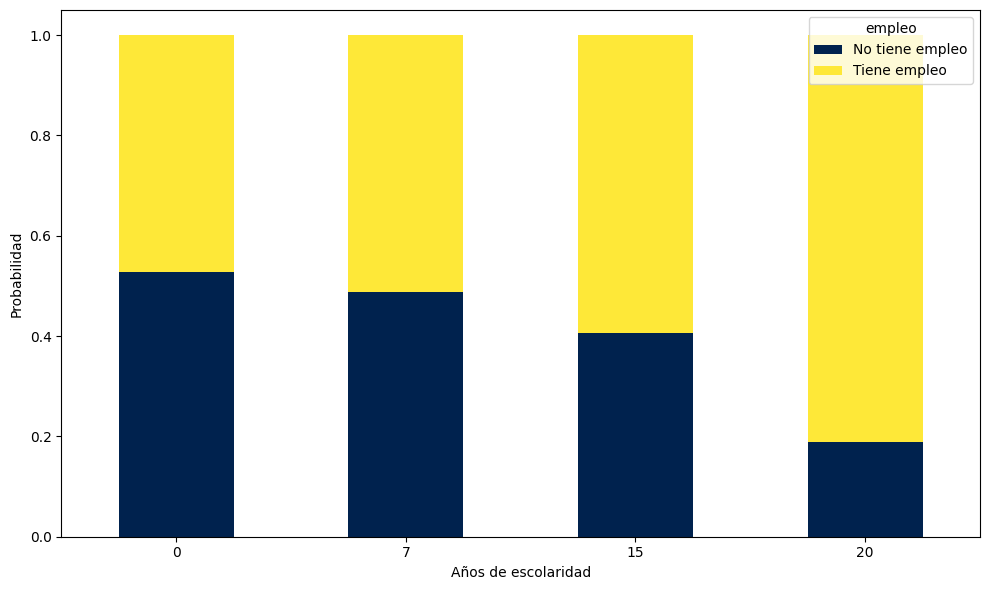

In [136]:
valores_posibles = [0,7,15,20]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'escolaridad': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='cividis', figsize=(10,6))


df_res.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10,6))

plt.xlabel('Años de escolaridad')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_6_1.png')
plt.show()

###P(Empleo|raza)

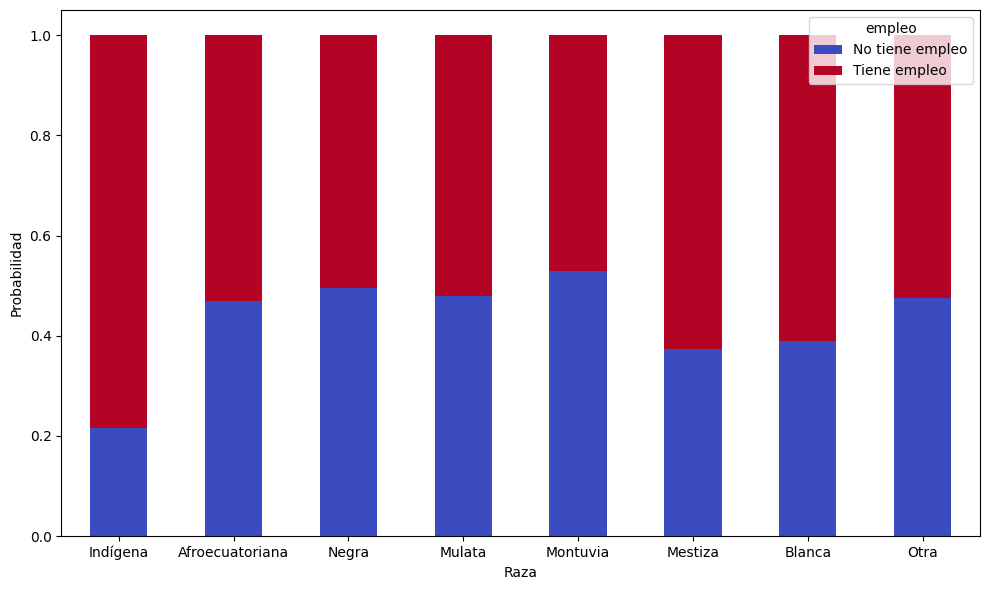

In [137]:
valores_posibles = [i for i in range(1,9)]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'raza': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

df_res.index = ['Indígena', 'Afroecuatoriana', 'Negra', 'Mulata', 'Montuvia', 'Mestiza','Blanca','Otra']


# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

#df_res_no_tiene_empleo.index = ['Indígena', 'Afroecuatoriana', 'Negra', 'Mulata', 'Montuvia', 'Mestiza','Blanca','Otra']


# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='coolwarm', figsize=(10,6))

df_res.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))

plt.xlabel('Raza')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_7_1.png')
plt.show()

##Extra

###Modelo 3

In [138]:
#Me quedo con las variables edad, estado_civil, ingrl_pareja,escolaridad,pers_por_hogar,empleo,area
df_final_3=df_resultado_modelo_2[['edad','estado_civil','ingrl_pareja','escolaridad','pers_por_hogar','empleo','area','raza','sabe_leer_escribir']]

In [139]:
#Me quedo solo con las obersvaciones que no poseen Nan en la variable sabe_leer_escribir
df_final_3=df_final_3[df_final_3['sabe_leer_escribir'].notna()]

In [140]:
df_final_3

,edad,estado_civil,ingrl_pareja,escolaridad,pers_por_hogar,empleo,area,raza,sabe_leer_escribir
2,37,1,250.0,6,5,0.0,1,6,1.0
3,37,1,420.0,6,5,0.0,1,6,1.0
5,43,1,500.0,6,4,0.0,1,6,1.0
12,58,1,500.0,5,2,0.0,1,6,1.0
13,59,1,500.0,1,2,0.0,1,6,1.0
...,...,...,...,...,...,...,...,...,...
94833,27,6,0.0,7,5,0.0,1,6,1.0
94834,27,6,0.0,7,5,0.0,1,6,1.0
94835,34,2,0.0,6,4,0.0,1,6,1.0
94849,23,6,0.0,9,2,0.0,1,6,1.0


####Grafo

In [141]:
#Preparar los datos -----------
data_np = df_final_3.to_numpy()
labels = df_final_3.columns.tolist()

#Ejecutar PC con G‑Square para variables discretas -----------
cit_obj = CIT(data_np, "gsq")  # o "chisq" según prefieras
cg = pc(data_np, alpha=0.01, indep_test_func=cit_obj, labels=labels)

  0%|          | 0/9 [00:00<?, ?it/s]

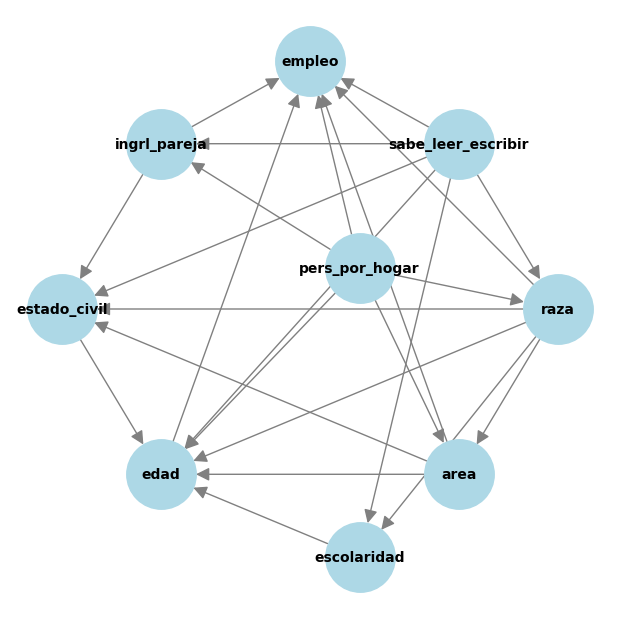

In [142]:
#Extraer aristas del grafo aprendido
converted_edges = []
for edge in cg.G.get_graph_edges():
    n1 = edge.node1.get_name()
    n2 = edge.node2.get_name()
    idx1 = int(n1[1:]) - 1  # X1 → índice 0
    idx2 = int(n2[1:]) - 1
    name1 = labels[idx1]
    name2 = labels[idx2]
    converted_edges.append((name1, name2))

#Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(converted_edges)

plt.figure(figsize=(6, 6))
#Posiciones
pos = {
    'edad': (0, 0),
    'estado_civil': (-1,2),
    'ingrl_pareja': (0,4),
    'escolaridad': (2,-1),
    'pers_por_hogar': (2,2.5),
    'empleo': (1.5,5),
    'area': (3,0),
    'raza': (4,2),
    'sabe_leer_escribir': (3,4),
}

#Grafico
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)
plt.axis("off")
plt.savefig('Fig_8_1.png')
plt.show()

#Escenario 2

##Importacion de base de datos

In [143]:
try:
    df = pd.read_csv(file_path, sep=";")
    print("Archivo CSV cargado exitosamente.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

/tmp/ipython-input-2798219710.py:2: DtypeWarning: Columns (131,132,135) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";")


Archivo CSV cargado exitosamente.


,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,prov,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes
0,1,10150,304,42,1,1,1,1,31,1,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403,3
1,1,10150,304,42,1,1,2,2,39,2,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3
2,1,10150,304,42,1,1,3,1,7,7,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110303,202403,3
3,1,10150,304,42,1,1,4,1,1,3,...,1,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110403,202403,3
4,1,10150,304,42,1,1,1,1,31,1,...,1,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406,6


###Depuracion variable: ingrl

In [144]:
#cambiar ingrl de objet to float
df['ingrl'] = pd.to_numeric(df['ingrl'], errors='coerce')
#Cambiar los que tengan ingrl=999999 a NaN"
df['ingrl'] = df['ingrl'].replace(999999, np.nan)
df['ingrl'] = df['ingrl'].replace(-1, np.nan)

###Depuracion variable: empleo

In [145]:
#convertimos empleo en float
df['empleo'] = pd.to_numeric(df['empleo'], errors='coerce')
#reemplazamos como 0 donde la variable desempleo sea igual a 1
df.loc[df['desempleo'] == "1", 'empleo'] = 0

In [146]:
#Eliminamos todas las observaciones que tengan missing en empleo
df = df.dropna(subset=['empleo'])

###Numero de personas en el hogar

In [147]:
# Crear una nueva columna con el número de observaciones por id_hogar
df['pers_por_hogar'] = df.groupby('id_hogar')['id_hogar'].transform('count')

display(df.head(15))

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,dominio,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar
0,1,10150,304,42,1,1,1,1,31,1,...,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403,3,2
1,1,10150,304,42,1,1,2,2,39,2,...,3,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,2
4,1,10150,304,42,1,1,1,1,31,1,...,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406,6,2
5,1,10150,304,42,1,1,2,2,39,2,...,3,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,2
8,1,10150,304,42,2,1,1,1,56,1,...,3,0,0,10150000304,101500003040420203,1015000030404202103,0101500003040420210103,202403,3,2
9,1,10150,304,42,2,1,2,2,30,3,...,3,0,0,10150000304,101500003040420203,1015000030404202103,0101500003040420210203,202403,3,2
11,1,10150,304,42,2,1,1,1,56,1,...,3,0,0,10150000304,101500003040420206,1015000030404202106,0101500003040420210106,202406,6,2
12,1,10150,304,42,2,1,2,2,30,3,...,3,0,0,10150000304,101500003040420206,1015000030404202106,0101500003040420210206,202406,6,2
14,1,10150,304,42,3,1,1,1,32,1,...,3,1,0,10150000304,101500003040420303,1015000030404203103,0101500003040420310103,202403,3,1
19,1,10150,304,42,3,1,1,1,33,1,...,3,0,0,10150000304,101500003040420306,1015000030404203106,0101500003040420310106,202406,6,1


###Variable de escolaridad

In [148]:
#cambiar p10a y p10b de objet to float
df['p10a'] = pd.to_numeric(df['p10a'], errors='coerce')
df['p10b'] = pd.to_numeric(df['p10b'], errors='coerce')

In [149]:
# Inicializar la columna 'escolaridad' con valor 0 cuando p10a == 1
df['escolaridad'] = 0
df.loc[df['p10a'] == 1, 'escolaridad'] = 0

# Reemplazar 'escolaridad' con 'p10b' cuando p10a == 2, 4, o 5
df.loc[df['p10a'].isin([2, 4, 5]), 'escolaridad'] = df['p10b']

# Reemplazar 'escolaridad' con 'p10b + 6' cuando p10a == 6 o 7
df.loc[df['p10a'].isin([6, 7]), 'escolaridad'] = df['p10b'] + 6

# Reemplazar 'escolaridad' con 'p10b + 12' cuando p10a == 8 o 9
df.loc[df['p10a'].isin([8, 9]), 'escolaridad'] = df['p10b'] + 12

# Reemplazar 'escolaridad' con 'p10b + 17' cuando p10a == 10
df.loc[df['p10a'] == 10, 'escolaridad'] = df['p10b'] + 17

# Mostrar los primeros registros para verificar
display(df.head())

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,pobreza,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad
0,1,10150,304,42,1,1,1,1,31,1,...,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110103,202403,3,2,12
1,1,10150,304,42,1,1,2,2,39,2,...,0,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,2,19
4,1,10150,304,42,1,1,1,1,31,1,...,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110106,202406,6,2,12
5,1,10150,304,42,1,1,2,2,39,2,...,0,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,2,19
8,1,10150,304,42,2,1,1,1,56,1,...,0,0,10150000304,101500003040420203,1015000030404202103,0101500003040420210103,202403,3,2,2


##Rango de edad

In [150]:
#Edad
edad_floor=20
edad_roof=60

###Ingreso de la pareja

####Jefe de Hogar (hombre) - Conyuge (mujer)

In [151]:
fil_1=1 #hombre: jefe de hogar
fil_2=2 #mujer: conyuge

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].first().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_1 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

####Jefe de Hogar (mujer) - Conyuge (hombre)

In [152]:
fil_1=2 #hombre: conyuge
fil_2=1 #mujer: jefe de hogar

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].first().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_2 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

####Hija - Yerno

In [153]:
fil_1=4 #hombre: yerno
fil_2=3 #mujer: hija

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].mean().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_3 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

####Hijo - Nuera

In [154]:
fil_1=3 #hombre: hijo
fil_2=4 #mujer: nuera

# 1. Filtrar el DataFrame original por p06 == 3 y p02 == 2
df_filtrado_p04_p02 = df[(df['p04'] == fil_2) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

# 2. Filtrar y agrupar por id_hogar para obtener el valor de ingrl por hogar
df_filtrado = df[(df['p04'] == fil_1) & (df['p02'] == 1)]
df_agrupado = df_filtrado.groupby('id_hogar')['ingrl'].mean().reset_index()  # O puedes usar .mean() si prefieres el promedio

# 3. Renombramos la columna 'ingrl' a 'ingrl_p02_1' para indicar que es el ingreso por hogar con p02 == 1
df_agrupado = df_agrupado.rename(columns={'ingrl': 'ingrl_pareja'})

# 4. Realizar el merge entre df_filtrado_p06_p02 y df_agrupado en la columna 'id_hogar'
df_resultado_4 = pd.merge(df_filtrado_p04_p02, df_agrupado, on='id_hogar', how='left')

##Grafos causales

###Modelo 1

In [155]:
#Se hace un filtro con el resto de mujeres
df_resultado_5 = df[(~df['p04'].isin([1,2]) ) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

In [156]:
#Hacemos un append
df_resultado_modelo_1 = pd.concat([df_resultado_1, df_resultado_2,df_resultado_5], ignore_index=True)

In [157]:
df_resultado_modelo_1

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad,ingrl_pareja
0,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,2,19,1010.0
1,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,2,19,1121.0
2,1,10150,304,48,3,1,2,2,43,2,...,0,10150000304,101500003040480309,1015000030404803109,0101500003040480310209,202409,9,2,19,1310.0
3,1,10150,304,48,3,1,2,2,44,2,...,0,10150000304,101500003040480312,1015000030404803112,0101500003040480310212,202412,12,2,19,2200.0
4,1,10150,304,48,7,1,2,2,29,2,...,0,10150000304,101500003040480709,1015000030404807109,0101500003040480710209,202409,9,2,9,514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63768,1,240352,3202,37,2,1,3,2,35,3,...,0,240352003202,2403520032020370204,24035200320203702104,2403520032020370210304,202404,4,2,12,NaN
63769,1,240352,3202,37,3,1,3,2,44,3,...,0,240352003202,2403520032020370301,24035200320203703101,2403520032020370310301,202401,1,2,12,NaN
63770,1,240352,3202,37,3,1,3,2,42,3,...,0,240352003202,2403520032020370304,24035200320203703104,2403520032020370310304,202404,4,2,17,NaN
63771,1,240352,3202,37,6,1,3,2,39,3,...,0,240352003202,2403520032020370604,24035200320203706104,2403520032020370610304,202404,4,3,9,NaN


In [158]:
#Comprobar si hay duplicados de id_persona
df_resultado_modelo_1[df_resultado_modelo_1.duplicated(subset='id_persona', keep=False)]

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad,ingrl_pareja


####Base de datos final

In [159]:
#A la variable ingrl a los Nan los pongo 0
df_resultado_modelo_1['ingrl_pareja'] = df_resultado_modelo_1['ingrl_pareja'].fillna(0)

In [160]:
#cambiar nombres a las variabkles
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p03': 'edad'})
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p06':'estado_civil'})
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p11':'sabe_leer_escribir'})
df_resultado_modelo_1 = df_resultado_modelo_1.rename(columns={'p15':'raza'})

In [161]:
#cambiar estado_civil, sabe_leer_escribir,raza de objet to float
df_resultado_modelo_1['estado_civil'] = pd.to_numeric(df_resultado_modelo_1['estado_civil'], errors='coerce')
df_resultado_modelo_1['sabe_leer_escribir'] = pd.to_numeric(df_resultado_modelo_1['sabe_leer_escribir'], errors='coerce')
df_resultado_modelo_1['raza'] = pd.to_numeric(df_resultado_modelo_1['raza'], errors='coerce')

In [162]:
#Me quedo con las variables edad, estado_civil, ingrl_pareja,escolaridad,pers_por_hogar,empleo,area
df_final_1=df_resultado_modelo_1[['edad','estado_civil','ingrl_pareja','escolaridad','pers_por_hogar','empleo','area','raza']]

In [163]:
df_final_1.describe()

,edad,estado_civil,ingrl_pareja,escolaridad,pers_por_hogar,empleo,area,raza
count,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000
mean,39.803255,3.638938,283.613269,11.651561,2.415615,0.940680,1.245025,5.468505
std,11.289067,2.139861,620.359494,4.577122,1.145647,0.236224,0.430106,1.483882
min,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,30.000000,1.000000,0.000000,9.000000,2.000000,1.000000,1.000000,6.000000
50%,40.000000,5.000000,0.000000,12.000000,2.000000,1.000000,1.000000,6.000000
75%,49.000000,6.000000,430.000000,16.000000,3.000000,1.000000,1.000000,6.000000
max,60.000000,6.000000,20000.000000,22.000000,12.000000,1.000000,2.000000,8.000000


####Grafo

In [164]:
#Preparar los datos -----------
data_np = df_final_1.to_numpy()
labels = df_final_1.columns.tolist()

#Ejecutar PC con G‑Square para variables discretas -----------
cit_obj = CIT(data_np, "gsq")  # o "chisq" según prefieras
cg = pc(data_np, alpha=0.01, indep_test_func=cit_obj, labels=labels)

  0%|          | 0/8 [00:00<?, ?it/s]

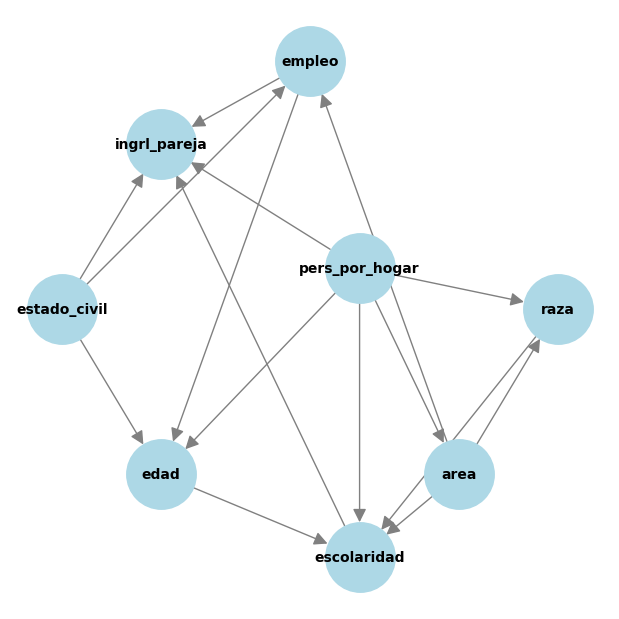

In [165]:
#Extraer aristas del grafo aprendido
converted_edges = []
for edge in cg.G.get_graph_edges():
    n1 = edge.node1.get_name()
    n2 = edge.node2.get_name()
    idx1 = int(n1[1:]) - 1  # X1 → índice 0
    idx2 = int(n2[1:]) - 1
    name1 = labels[idx1]
    name2 = labels[idx2]
    converted_edges.append((name1, name2))

#Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(converted_edges)

plt.figure(figsize=(6, 6))
#Posiciones
pos = {
    'edad': (0, 0),
    'estado_civil': (-1,2),
    'ingrl_pareja': (0,4),
    'escolaridad': (2,-1),
    'pers_por_hogar': (2,2.5),
    'empleo': (1.5,5),
    'area': (3,0),
    'raza': (4,2),
}

#Grafico
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)
plt.axis("off")
plt.savefig('Fig_1_2.png')
plt.show()

###Modelo 2

In [166]:
#Se hace un filtro con el resto de mujeres
df_resultado_5 = df[(~df['p04'].isin([1,2,3,4]) ) &
                          (df['p02'] == 2) &
                          (df['p03'] >= edad_floor) &
                          (df['p03'] <= edad_roof)]

In [167]:
#Hacemos un append
df_resultado_modelo_2 = pd.concat([df_resultado_1, df_resultado_2,df_resultado_3,df_resultado_4,df_resultado_5], ignore_index=True)

In [168]:
df_resultado_modelo_2

,area,ciudad,conglomerado,panelm,vivienda,hogar,p01,p02,p03,p04,...,epobreza,upm,id_vivienda,id_hogar,id_persona,periodo,mes,pers_por_hogar,escolaridad,ingrl_pareja
0,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420103,1015000030404201103,0101500003040420110203,202403,3,2,19,1010.0
1,1,10150,304,42,1,1,2,2,39,2,...,0,10150000304,101500003040420106,1015000030404201106,0101500003040420110206,202406,6,2,19,1121.0
2,1,10150,304,48,3,1,2,2,43,2,...,0,10150000304,101500003040480309,1015000030404803109,0101500003040480310209,202409,9,2,19,1310.0
3,1,10150,304,48,3,1,2,2,44,2,...,0,10150000304,101500003040480312,1015000030404803112,0101500003040480310212,202412,12,2,19,2200.0
4,1,10150,304,48,7,1,2,2,29,2,...,0,10150000304,101500003040480709,1015000030404807109,0101500003040480710209,202409,9,2,9,514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63768,1,240352,804,40,2,1,3,2,39,8,...,0,240352000804,2403520008040400201,24035200080404002101,2403520008040400210301,202401,1,2,9,NaN
63769,1,240352,804,54,3,1,2,2,23,5,...,0,240352000804,2403520008040540304,24035200080405403104,2403520008040540310204,202404,4,1,17,NaN
63770,1,240352,804,54,3,1,2,2,23,5,...,0,240352000804,2403520008040540307,24035200080405403107,2403520008040540310207,202407,7,1,17,NaN
63771,1,240352,1401,47,3,1,2,2,27,9,...,0,240352001401,2403520014010470311,24035200140104703111,2403520014010470310211,202411,11,3,16,NaN


####Base de datos final

In [169]:
#A la variable ingrl a los Nan los pongo 0
df_resultado_modelo_2['ingrl_pareja'] = df_resultado_modelo_2['ingrl_pareja'].fillna(0)

In [170]:
#cambiar nombres a las variabkles
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p03': 'edad'})
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p06':'estado_civil'})
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p11':'sabe_leer_escribir'})
df_resultado_modelo_2 = df_resultado_modelo_2.rename(columns={'p15':'raza'})

In [171]:
#cambiar estado_civil, sabe_leer_escribir,raza de objet to float
df_resultado_modelo_2['estado_civil'] = pd.to_numeric(df_resultado_modelo_2['estado_civil'], errors='coerce')
df_resultado_modelo_2['sabe_leer_escribir'] = pd.to_numeric(df_resultado_modelo_2['sabe_leer_escribir'], errors='coerce')
df_resultado_modelo_2['raza'] = pd.to_numeric(df_resultado_modelo_2['raza'], errors='coerce')

In [172]:
#Me quedo con las variables edad, estado_civil, ingrl_pareja,escolaridad,pers_por_hogar,empleo,area
df_final_2=df_resultado_modelo_2[['edad','estado_civil','ingrl_pareja','escolaridad','pers_por_hogar','empleo','area','raza']]

In [173]:
df_final_2.describe()

,edad,estado_civil,ingrl_pareja,escolaridad,pers_por_hogar,empleo,area,raza
count,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000,63773.000000
mean,39.803255,3.638938,304.602168,11.651561,2.415615,0.940680,1.245025,5.468505
std,11.289067,2.139861,626.753606,4.577122,1.145647,0.236224,0.430106,1.483882
min,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,30.000000,1.000000,0.000000,9.000000,2.000000,1.000000,1.000000,6.000000
50%,40.000000,5.000000,0.000000,12.000000,2.000000,1.000000,1.000000,6.000000
75%,49.000000,6.000000,465.000000,16.000000,3.000000,1.000000,1.000000,6.000000
max,60.000000,6.000000,20000.000000,22.000000,12.000000,1.000000,2.000000,8.000000


####Grafo

In [174]:
#Preparar los datos -----------
data_np = df_final_2.to_numpy()
labels = df_final_2.columns.tolist()

#Ejecutar PC con G‑Square para variables discretas -----------
cit_obj = CIT(data_np, "gsq")  # o "chisq" según prefieras
cg = pc(data_np, alpha=0.01, indep_test_func=cit_obj, labels=labels)

  0%|          | 0/8 [00:00<?, ?it/s]

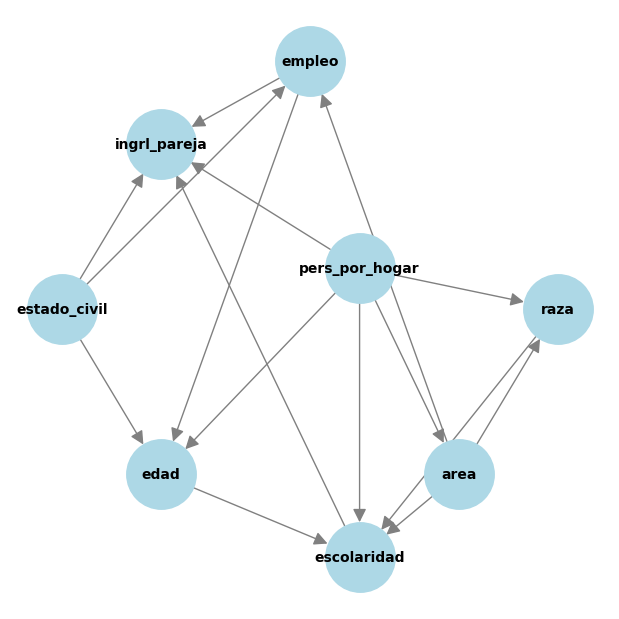

In [175]:
#Extraer aristas del grafo aprendido
converted_edges = []
for edge in cg.G.get_graph_edges():
    n1 = edge.node1.get_name()
    n2 = edge.node2.get_name()
    idx1 = int(n1[1:]) - 1  # X1 → índice 0
    idx2 = int(n2[1:]) - 1
    name1 = labels[idx1]
    name2 = labels[idx2]
    converted_edges.append((name1, name2))

#Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(converted_edges)

plt.figure(figsize=(6, 6))
#Posiciones
pos = {
    'edad': (0, 0),
    'estado_civil': (-1,2),
    'ingrl_pareja': (0,4),
    'escolaridad': (2,-1),
    'pers_por_hogar': (2,2.5),
    'empleo': (1.5,5),
    'area': (3,0),
    'raza': (4,2),
}

#Grafico
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)

plt.axis("off")
plt.savefig('Fig_2_2.png')
plt.show()

##Red bayesiana

In [176]:
# Crear el modelo con la estructura aprendida
model = DiscreteBayesianNetwork(converted_edges)

# Ajustar el modelo a los datos
model.fit(df_final_2, estimator=BayesianEstimator, prior_type='BDeu')

In [177]:
# Verificar que el modelo es válido
assert model.check_model()

In [178]:
# Crear objeto de inferencia usando eliminación de variables
infer = VariableElimination(model)

###P(Empleo|ingrl_pareja)

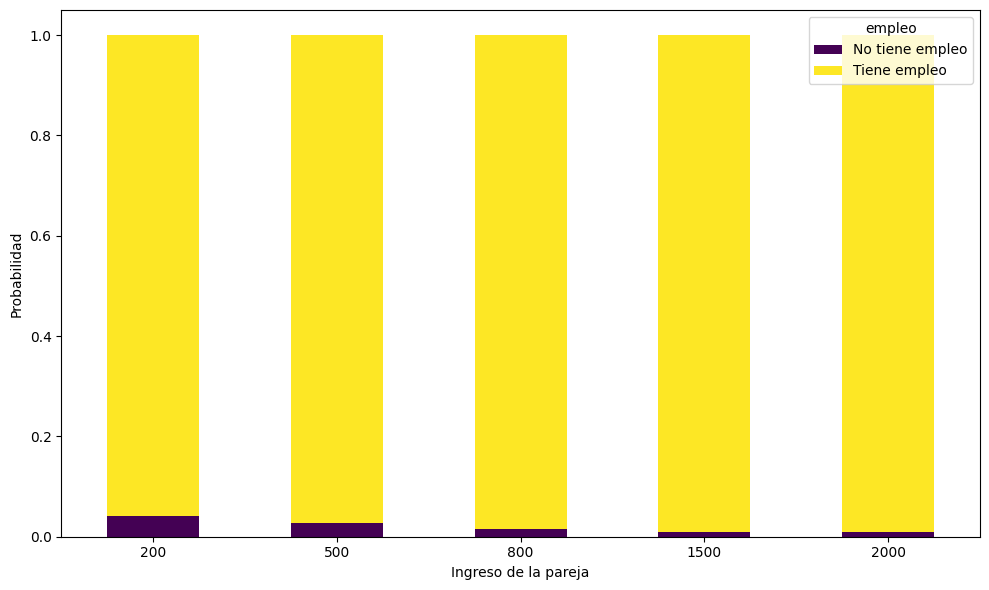

In [179]:
valores_posibles=[200,500,800,1500,2000]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'ingrl_pareja': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='viridis', figsize=(10,6))

df_res.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))

plt.xlabel('Ingreso de la pareja')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_3_2.png')
plt.show()

###P(Empleo|estado_civil)

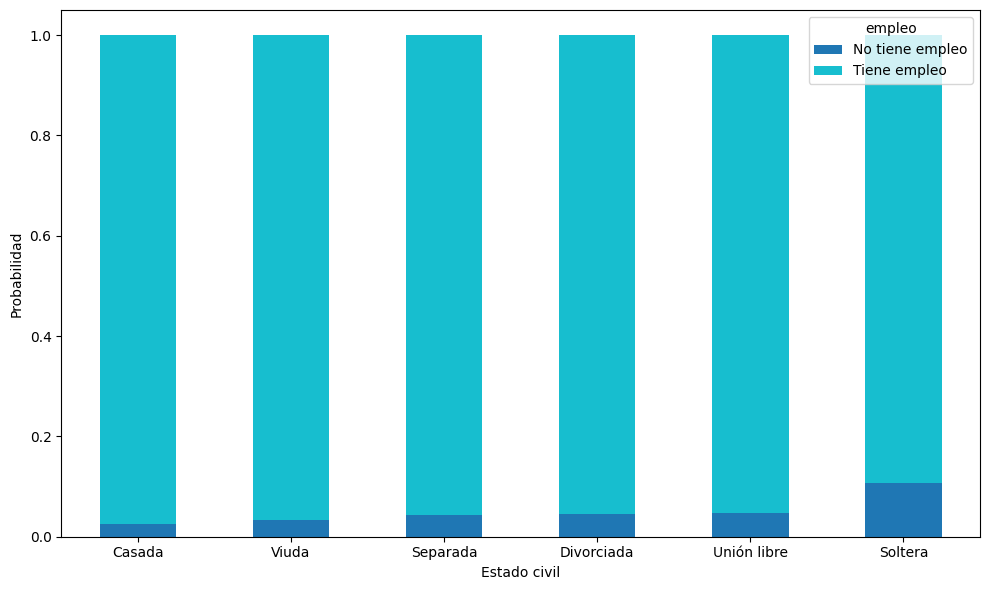

In [180]:
valores_posibles = [1,4,2,3,5,6]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'estado_civil': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

df_res.index = ['Casada', 'Viuda', 'Separada', 'Divorciada', 'Unión libre', 'Soltera']


# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

#df_res_no_tiene_empleo.index = ['Casada', 'Viuda', 'Separada', 'Divorciada', 'Unión libre', 'Soltera']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='tab10', figsize=(10,6))

df_res.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))

plt.xlabel('Estado civil')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_4_2.png')
plt.show()

###P(Empleo|pers_por_hogar)

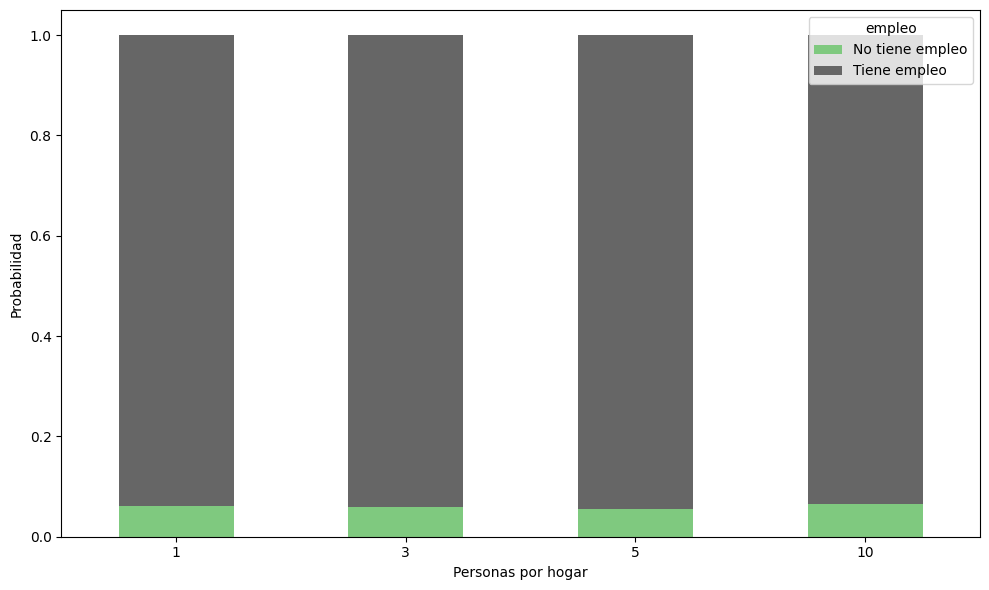

In [181]:
valores_posibles = [1,3,5,10]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'pers_por_hogar': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='Accent', figsize=(10,6))


df_res.plot(kind='bar', stacked=True, colormap='Accent', figsize=(10,6))

plt.xlabel('Personas por hogar')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_5_2.png')
plt.show()

###P(Empleo|escolaridad)

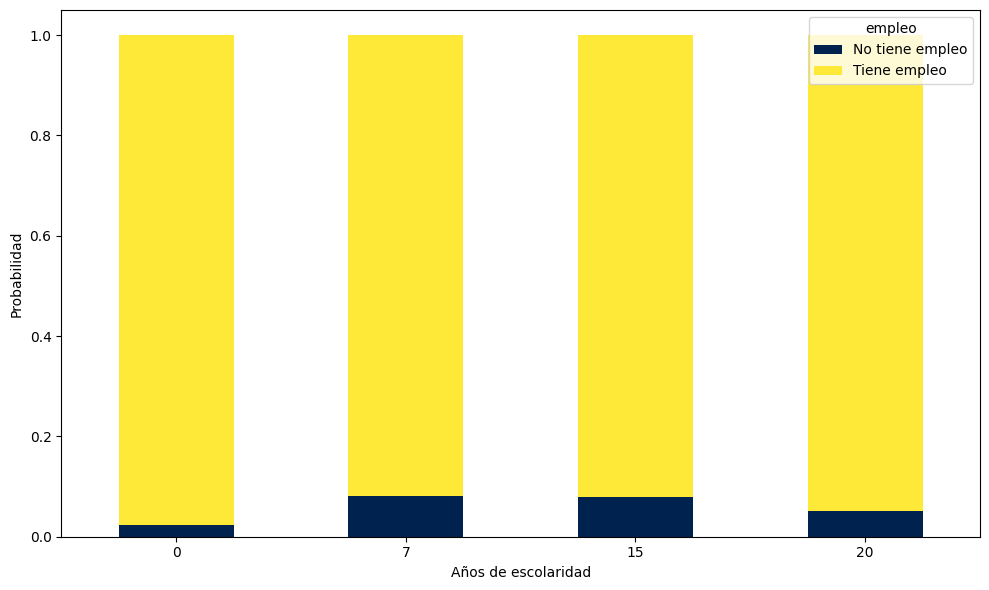

In [182]:
valores_posibles = [0,7,15,20]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'escolaridad': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='cividis', figsize=(10,6))


df_res.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10,6))

plt.xlabel('Años de escolaridad')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_6_2.png')
plt.show()

###P(Empleo|raza)

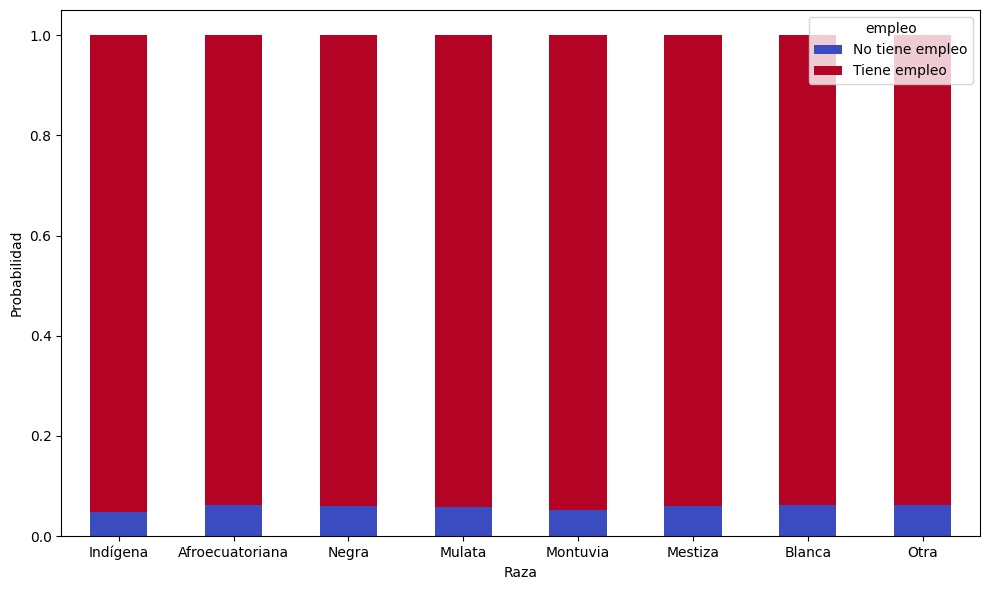

In [183]:
valores_posibles = [i for i in range(1,9)]
resultados = {}

for s in valores_posibles:
    result = infer.query(variables=['empleo'], evidence={'raza': s})
    #print(f"\nP(empleo | ingrl_pareja = {s}):\n", result)
    # Almacenar la distribución de probabilidades
    resultados[s] = result.values

# Crear DataFrame: filas = valores de ingreso, columnas = categorías de empleo
df_res = pd.DataFrame.from_dict(resultados, orient='index')

# Añadir nombres de columnas si quieres
df_res.columns = ['No tiene empleo', 'Tiene empleo']

df_res.index = ['Indígena', 'Afroecuatoriana', 'Negra', 'Mulata', 'Montuvia', 'Mestiza','Blanca','Otra']


# Filtrar el DataFrame para quedarte solo con la columna 'No tiene empleo'
#df_res_no_tiene_empleo = df_res['No tiene empleo']

#df_res_no_tiene_empleo.index = ['Indígena', 'Afroecuatoriana', 'Negra', 'Mulata', 'Montuvia', 'Mestiza','Blanca','Otra']


# Graficar solo la columna 'No tiene empleo'
#df_res_no_tiene_empleo.plot(kind='bar', stacked=False, colormap='coolwarm', figsize=(10,6))

df_res.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))

plt.xlabel('Raza')
plt.ylabel('Probabilidad')
plt.legend(title='empleo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Fig_7_2.png')
plt.show()

##Extra

###Modelo 3

In [184]:
#Me quedo con las variables edad, estado_civil, ingrl_pareja,escolaridad,pers_por_hogar,empleo,area
df_final_3=df_resultado_modelo_2[['edad','estado_civil','ingrl_pareja','escolaridad','pers_por_hogar','empleo','area','raza','sabe_leer_escribir']]

In [185]:
#Me quedo solo con las obersvaciones que no poseen Nan en la variable sabe_leer_escribir
df_final_3=df_final_3[df_final_3['sabe_leer_escribir'].notna()]

In [186]:
df_final_3

,edad,estado_civil,ingrl_pareja,escolaridad,pers_por_hogar,empleo,area,raza,sabe_leer_escribir
7,39,5,115.0,6,3,1.0,1,6,1.0
14,33,1,470.0,6,2,1.0,1,6,1.0
25,44,5,620.0,6,2,1.0,1,6,1.0
26,45,5,0.0,6,2,1.0,1,6,1.0
32,54,1,195.0,6,3,1.0,1,6,1.0
...,...,...,...,...,...,...,...,...,...
63713,26,6,0.0,7,1,1.0,2,6,1.0
63714,27,6,0.0,7,1,1.0,2,6,1.0
63726,21,2,0.0,7,2,1.0,1,6,1.0
63733,52,6,0.0,6,3,1.0,1,6,1.0


####Grafo

In [187]:
#Preparar los datos -----------
data_np = df_final_3.to_numpy()
labels = df_final_3.columns.tolist()

#Ejecutar PC con G‑Square para variables discretas -----------
cit_obj = CIT(data_np, "gsq")  # o "chisq" según prefieras
cg = pc(data_np, alpha=0.01, indep_test_func=cit_obj, labels=labels)

  0%|          | 0/9 [00:00<?, ?it/s]

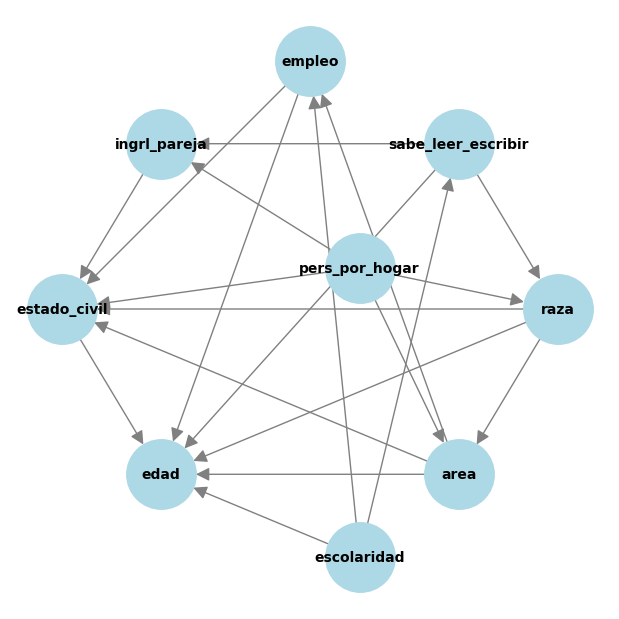

In [188]:
#Extraer aristas del grafo aprendido
converted_edges = []
for edge in cg.G.get_graph_edges():
    n1 = edge.node1.get_name()
    n2 = edge.node2.get_name()
    idx1 = int(n1[1:]) - 1  # X1 → índice 0
    idx2 = int(n2[1:]) - 1
    name1 = labels[idx1]
    name2 = labels[idx2]
    converted_edges.append((name1, name2))

#Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(converted_edges)

plt.figure(figsize=(6, 6))
#Posiciones
pos = {
    'edad': (0, 0),
    'estado_civil': (-1,2),
    'ingrl_pareja': (0,4),
    'escolaridad': (2,-1),
    'pers_por_hogar': (2,2.5),
    'empleo': (1.5,5),
    'area': (3,0),
    'raza': (4,2),
    'sabe_leer_escribir': (3,4),
}

#Grafico
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)
plt.axis("off")
plt.savefig('Fig_8_2.png')
plt.show()